In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Intelligent Data Analysis Project

## Income

A polling institute wants to be able to estimate an individual’s income from his/her personal data (see einkommen.train). To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are available. Crucially, the income of only 5.000 of the interviewee’s is known.

Your task is to predict the income group of the remaining 25.000 interviewees and to prepare the data such that they can be used for further regression and correlation analyses.

Load the data into Python and preprocess it. Choose adequate data transformations, normalizations etc. and decide on how to deal with missing values (marked with “?”). Consider which kinds of features the preprocessed data shall contain. Once you have preprocessed the data, train a model to predict a person’s income group and apply it to the 25.000 individuals whose income group is unknown. Identify a suitable learning method and implement it in Python. Train and evaluate the model. Provide a short documentation and motivation of each of your steps.

In [37]:
# Import data set and add column names
income = pd.read_csv('data/income/einkommen.train', sep=",", na_values = " ?", header=None)
columns = ["Age", "Employment type", "Interview-dependent", "Education level", "Schooling/training period", "Marital Status", "Employment area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Working time(Weekly)", "Country", "Income"]
income.columns = columns

In [38]:
# Split data set into sets where Income is known or unknwn
income_labeled = income[income['Income'].notnull()]
income_unlabeled = income[income['Income'].isnull()]

In [39]:
income_labeled.nunique()

Age                            69
Employment type                 7
Interview-dependent          4603
Education level                16
Schooling/training period      16
Marital Status                  7
Employment area                14
Partnership                     6
Ethnicity                       5
Gender                          2
Gains                          83
Losses                         55
Working time(Weekly)           74
Country                        39
Income                          2
dtype: int64

In [40]:
income_labeled.isna().sum()

Age                            0
Employment type              331
Interview-dependent            0
Education level                0
Schooling/training period      0
Marital Status                 0
Employment area              331
Partnership                    0
Ethnicity                      0
Gender                         0
Gains                          0
Losses                         0
Working time(Weekly)           0
Country                       97
Income                         0
dtype: int64

In [41]:
# income_labeled[income_labeled['Employment area'].isnull()].sort_values(by="Working time(Weekly)")
# income_labeled['Country'].unique()

## Problem Setting

## Analysis

In [42]:
# Look at input values
income_labeled.head()

,Age,Employment type,Interview-dependent,Education level,Schooling/training period,Marital Status,Employment area,Partnership,Ethnicity,Gender,Gains,Losses,Working time(Weekly),Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


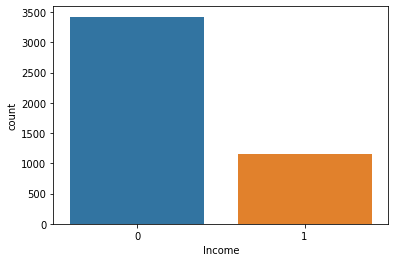

In [66]:
# Check balance between label that has to be predicted
target_distribution = sns.countplot(x=income_labeled["Income"])

## Data Preparation

In [43]:
## Handling Missing Values
print(income_labeled.isna().sum())

income_labeled = income_labeled.dropna()

Age                            0
Employment type              331
Interview-dependent            0
Education level                0
Schooling/training period      0
Marital Status                 0
Employment area              331
Partnership                    0
Ethnicity                      0
Gender                         0
Gains                          0
Losses                         0
Working time(Weekly)           0
Country                       97
Income                         0
dtype: int64


In [53]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode categorical variables
income_labeled['Income'].replace([' <=50K', ' >50K'], [0, 1], inplace=True)
income_labeled = income_labeled.select_dtypes(include=['int64'])


In [54]:
from sklearn.model_selection import train_test_split

# Train / Test-Split
income_X_train, income_X_test, income_y_train, income_y_test = train_test_split(income_labeled.drop('Income', axis=1), income_labeled['Income'], test_size=0.33, random_state=42)


In [55]:
income_y_train

3880    1
2004    0
96      1
2416    0
2637    1
       ..
4839    0
505     0
3368    1
4113    0
935     1
Name: Income, Length: 3068, dtype: int64

## Methods (& Experiments)

### Linear Classification

In [64]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(income_X_train, income_y_train)

income_y_pred = clf.predict(income_X_test)

accuracy_score(income_y_test, income_y_pred)

0.7546296296296297

### Decision Trees

0.78505291005291

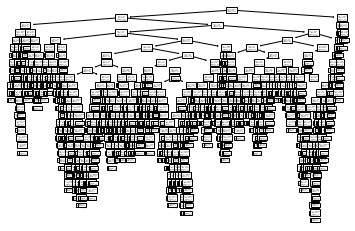

In [68]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(income_X_train, income_y_train)
tree.plot_tree(clf)

income_y_pred = clf.predict(income_X_test)

accuracy_score(income_y_test, income_y_pred)


In [70]:
from sklearn.tree import export_text

r = export_text(clf, feature_names=iris['feature_names'])
print(r)

NameError: name 'iris' is not defined

## Conclusion

## Credit

A bank wants to predict the creditworthiness of its customers. Based on the customer records, the credit history, etc., a customer should be classified as creditworthy or unworthy of credit. It is five times more ‘expensive’ for the bank to rate a customer who is unworthy of credit as creditworthy than vice versa. In addition, not all information is available for all customers. For 1,000 representatively selected customers, the creditworthiness is known. For these customers the following data has been collected. (Features for which not all values are known are marked with the addition “incomplete”.)

You were asked to develop a predictive model that assesses the creditworthiness of future clients. It can be assumed that for these clients as well, there are missing values in the features “Purpose”, “Present employment since”, “Job” and “Foreign worker”.

Read the data into Python and proprocess them. Replace missing values ?using? linear regression or classification. Identify a suitable method for solving the prediction problem, implement it in Python, and train the model. Evaluate the model in terms of the bank’s cost model. Briefly motivate and document all the steps you have taken.

In [ ]:
credit = pd.read_csv('data/credit/kredit.dat', sep="\t", header=None, na_values="?")
columns = ['status','duration','credit_history','purpose','credit_amount','savings_account/bonds', 'present_employement_since','installment_rate','personal_status_and_sex','other_debtors/guarantors', 'present_residence_since','property','age','other_installment_plans','housing', 'number_of_existing_credits','job','number_of_people_being_liable','telephone','foreign_worker', 'creditworthy']
credit.columns = columns
credit.shape

(1000, 21)

In [ ]:
display(credit.head(5))

,status,duration,credit_history,purpose,credit_amount,savings_account/bonds,present_employement_since,installment_rate,personal_status_and_sex,other_debtors/guarantors,...,property,age,other_installment_plans,housing,number_of_existing_credits,job,number_of_people_being_liable,telephone,foreign_worker,creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [ ]:
credit.isna().sum()

status                             0
duration                           0
credit_history                     0
purpose                          173
credit_amount                      0
savings_account/bonds              0
present_employement_since        496
installment_rate                   0
personal_status_and_sex            0
other_debtors/guarantors           0
present_residence_since            0
property                           0
age                                0
other_installment_plans            0
housing                            0
number_of_existing_credits         0
job                              232
number_of_people_being_liable      0
telephone                          0
foreign_worker                   360
creditworthy                       0
dtype: int64

## Insurance

### Provided Information

You have been asked by an insurance company to analyze customer and sales data (caravan.train). These data contain 86 different kinds of information about the company’s customers (see caravan.info). The insurance company would like to know from you which customers (caravan.test) could be interested in a caravan insurance and especially why. The insurance company expects you to present your results in a credible manner – only then will the results be taken into account in the company’s decision-making processes!

Perform an analysis of the given data: Read the data into Python, preprocess the data and chose a suitable method for solving the analysis problem. Implement this method in Python. Train and evaluate the model. Apply the model to the test data. Make the statements required by the insurance company. Briefly motivate and document all steps of your data analysis.

---
Information found on: https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html or here https://www.rdocumentation.org/packages/kernlab/versions/0.9-30/topics/ticdata

Papers/Approaches: https://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/report2.html

TICDATA2000.txt: 
Dataset to train and validate prediction models and build a description (5822 customer records). Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) and product ownership (attributes 44-86).The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Attribute 86, "CARAVAN:Number of mobile home policies", is the target variable. 

TICEVAL2000.txt: 
Dataset for predictions (4000 customer records). It has the same format as TICDATA2000.txt, only the target is missing. Participants are supposed to return the list of predicted targets only. All datasets are in tab delimited format. 
The meaning of the attributes and attribute values is given below.

TICTGTS2000.txt
Targets for the evaluation set.

**sociodemographic data**

    1 	STYPE 	Customer Subtype
	2 	MAANTHUI 	Number of houses 1 - 10
	3 	MGEMOMV 	Avg size household 1 - 6
	4 	MGEMLEEF 	Average age
	5 	MOSHOOFD 	Customer main type
	6 	MGODRK 	Roman catholic
	7 	MGODPR 	Protestant ...
	8 	MGODOV 	Other religion
	9 	MGODGE 	No religion
	10 	MRELGE 	Married
	11 	MRELSA 	Living together
	12 	MRELOV 	Other relation
	13 	MFALLEEN 	Singles
	14 	MFGEKIND 	Household without children
	15 	MFWEKIND 	Household with children
	16 	MOPLHOOG 	High level education
	17 	MOPLMIDD 	Medium level education
	18 	MOPLLAAG 	Lower level education
	19 	MBERHOOG 	High status
	20 	MBERZELF 	Entrepreneur
	21 	MBERBOER 	Farmer
	22 	MBERMIDD 	Middle management
	23 	MBERARBG 	Skilled labourers
	24 	MBERARBO 	Unskilled labourers
	25 	MSKA 	Social class A
	26 	MSKB1 	Social class B1
	27 	MSKB2 	Social class B2
	28 	MSKC 	Social class C
	29 	MSKD 	Social class D
	30 	MHHUUR 	Rented house
	31 	MHKOOP 	Home owners
	32 	MAUT1 	1 car
	33 	MAUT2 	2 cars
	34 	MAUT0 	No car
	35 	MZFONDS 	National Health Service
	36 	MZPART 	Private health insurance
	37 	MINKM30 	Income >30.000
	38 	MINK3045 	Income 30-45.000
	39 	MINK4575 	Income 45-75.000
	40 	MINK7512 	Income 75-122.000
	41 	MINK123M 	Income <123.000
	42 	MINKGEM 	Average income
	43 	MKOOPKLA 	Purchasing power class
    
**product ownership**

	44 	PWAPART 	Contribution private third party insurance
	45 	PWABEDR 	Contribution third party insurance (firms)
	46 	PWALAND 	Contribution third party insurance (agriculture)
	47 	PPERSAUT 	Contribution car policies
	48 	PBESAUT 	Contribution delivery van policies
	49 	PMOTSCO 	Contribution motorcycle/scooter policies
	50 	PVRAAUT 	Contribution lorry policies
	51 	PAANHANG 	Contribution trailer policies
	52 	PTRACTOR 	Contribution tractor policies
	53 	PWERKT 	Contribution agricultural machines policies
	54 	PBROM 	Contribution moped policies
	55 	PLEVEN 	Contribution life insurances
	56 	PPERSONG 	Contribution private accident insurance policies
	57 	PGEZONG 	Contribution family accidents insurance policies
	58 	PWAOREG 	Contribution disability insurance policies
	59 	PBRAND 	Contribution fire policies
	60 	PZEILPL 	Contribution surfboard policies
	61 	PPLEZIER 	Contribution boat policies
	62 	PFIETS 	Contribution bicycle policies
	63 	PINBOED 	Contribution property insurance policies
	64 	PBYSTAND 	Contribution social security insurance policies
	65 	AWAPART 	Number of private third party insurance 1 - 12
	66 	AWABEDR 	Number of third party insurance (firms) ...
	67 	AWALAND 	Number of third party insurance (agriculture)
	68 	APERSAUT 	Number of car policies
	69 	ABESAUT 	Number of delivery van policies
	70 	AMOTSCO 	Number of motorcycle/scooter policies
	71 	AVRAAUT 	Number of lorry policies
	72 	AAANHANG 	Number of trailer policies
	73 	ATRACTOR 	Number of tractor policies
	74 	AWERKT 	Number of agricultural machines policies
	75 	ABROM 	Number of moped policies
	76 	ALEVEN 	Number of life insurances
	77 	APERSONG 	Number of private accident insurance policies
	78 	AGEZONG 	Number of family accidents insurance policies
	79 	AWAOREG 	Number of disability insurance policies
	80 	ABRAND 	Number of fire policies
	81 	AZEILPL 	Number of surfboard policies
	82 	APLEZIER 	Number of boat policies
	83 	AFIETS 	Number of bicycle policies
	84 	AINBOED 	Number of property insurance policies
	85 	ABYSTAND 	Number of social security insurance policies
	86 	CARAVAN 	Number of mobile home policies 0 - 1 

In [ ]:
insurance_train_cat[:2:]

NameError: name 'insurance_train_cat' is not defined

In [ ]:
insurance_train_cat.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE',
       ...
       'PLEVEN_Label', 'PPERSONG_Label', 'PGEZONG_Label', 'PWAOREG_Label',
       'PBRAND_Label', 'PZEILPL_Label', 'PPLEZIER_Label', 'PFIETS_Label',
       'PINBOED_Label', 'PBYSTAND_Label'],
      dtype='object', length=146)

In [ ]:
# Continous/Ordinal variables

In [ ]:
insurance_train_cat.filter(regex=("M*")).shape

# Columns that start with M = Zipcode Area of customer (exceept for MOSTYPE)
insurance_train_cat.filter(regex=("^M."), axis=1).columns


# Columns that start with P = Contribution policies/insurances
insurance_train_cat.filter(regex=("^P."), axis=1).columns

# Columns that start with A = Number of Insurances
insurance_train_cat.filter(regex=("^A."), axis=1).columns

                    
# insurance_train_cat.filter(regex=".*C.*")

Index(['AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO',
       'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN',
       'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER',
       'AFIETS', 'AINBOED', 'ABYSTAND'],
      dtype='object')

In [ ]:
# Categorical variables

### Import

#### Import Files

In [ ]:
# For train, test and validation
insurance_train = pd.read_csv('data/insurance/caravan.train', sep='\t', header=None, encoding='cp1252')

# Data set with missing class labels
insurance_test = pd.read_csv('data/insurance/caravan.test', sep='\t', header=None, encoding='cp1252')

# Data Dictionary (not direct need to read in to the notebook)
insurance_info = pd.read_csv('data/insurance/caravan.info', sep='\t', header=None, encoding='cp1252', skiprows=1)

print("caravan.train:", insurance_train.shape)
print("caravan.test:", insurance_test.shape)

caravan.train: (5822, 86)
caravan.test: (4000, 85)


#### Set Column Names

In [ ]:
# Get the column names from insurance_info 
insurance_column_names = insurance_info[:87]
insurance_column_names

# Split into multiple columns
insurance_column_names = insurance_column_names[0].str.split(' ', 2, expand=True)

# Set first row as dataframe header
insurance_column_names.columns = insurance_column_names.iloc[0]
insurance_column_names = insurance_column_names[1:]

# Decrease nr by 1
insurance_column_names['Nr'] = insurance_column_names['Nr'].astype('int') - 1

# Rename columns in insurance_test and insurance_train
for index, contents in insurance_column_names.iterrows():
    insurance_train.columns = [contents[1] if x==contents[0] else x for x in insurance_train.columns]    
    insurance_test.columns = [contents[1] if x==contents[0] else x for x in insurance_test.columns]

#### Set Categorical Variables

In [ ]:
# 1 MOSTYPE Customer Subtype
customer_subtype = insurance_info[89:129]
customer_subtype = customer_subtype[0].str.split(' ', 1, expand=True)
customer_subtype.columns = ['Value', 'Label']
customer_subtype['Value'] = customer_subtype['Value'].astype('int64')
customer_subtype

,Value,Label
89,1,"High Income, expensive child"
90,2,Very Important Provincials
91,3,High status seniors
92,4,Affluent senior apartments
93,5,Mixed seniors
94,6,Career and childcare
95,7,Dinki's (double income no kids)
96,8,Middle class families
97,9,"Modern, complete families"
98,10,Stable family


In [ ]:
avg_age = insurance_info[131:136]
avg_age = avg_age[0].str.split(' ', 1, expand=True)
avg_age.columns = ['Value', 'Label']
avg_age['Value'] = avg_age['Value'].astype('int64')
avg_age

,Value,Label
131,1,20-30 years
132,2,30-40 years
133,3,40-50 years
134,4,50-60 years
135,5,60-70 years


In [ ]:
customer_main_type = insurance_info[138:148]
customer_main_type = customer_main_type[0].str.split(' ', 1, expand=True)
customer_main_type.columns = ['Value', 'Label']
customer_main_type['Value'] = customer_main_type['Value'].astype('int64')
customer_main_type

,Value,Label
138,1,Successful hedonists
139,2,Driven Growers
140,3,Average Family
141,4,Career Loners
142,5,Living well
143,6,Cruising Seniors
144,7,Retired and Religeous
145,8,Family with grown ups
146,9,Conservative families
147,10,Farmers


In [ ]:
percentage = insurance_info[150:159]
percentage = percentage[0].str.split(' ', 1, expand=True)
percentage.columns = ['Value', 'Label']
percentage['Value'] = percentage['Value'].astype('int64')
percentage

,Value,Label
150,1,1 - 10%
151,2,11 - 23%
152,3,24 - 36%
153,4,37 - 49%
154,5,50 - 62%
155,6,63 - 75%
156,7,76 - 88%
157,8,89 - 99%
158,9,100%


In [ ]:
contribution = insurance_info[160:170]
contribution = contribution[0].str.split(' ', 1, expand=True)
contribution.columns = ['Value', 'Label']
contribution['Value'] = contribution['Value'].astype('int64')
contribution

,Value,Label
160,0,f 0
161,1,f 1 – 49
162,2,f 50 – 99
163,3,f 100 – 199
164,4,f 200 – 499
165,5,f 500 – 999
166,6,f 1000 – 4999
167,7,f 5000 – 9999
168,8,f 10.000 - 19.999
169,9,f 20.000 - ?


In [ ]:
insurance_train_cat = insurance_train

# customer_subtype
insurance_train_cat = pd.merge(insurance_train_cat, customer_subtype, left_on='MOSTYPE', right_on='Value')
insurance_train_cat['MOSTYPE_Label'] = insurance_train_cat['Label']
insurance_train_cat = insurance_train_cat.drop(['Value', 'Label'], axis=1)
insurance_train_cat = insurance_train_cat.astype({'MOSTYPE':'category'})
insurance_train_cat = insurance_train_cat.astype({'MOSTYPE_Label':'category'})

# avg_age
insurance_train_cat = pd.merge(insurance_train_cat, avg_age, left_on='MGEMLEEF', right_on='Value')
insurance_train_cat['MGEMLEEF_Label'] = insurance_train_cat['Label']
insurance_train_cat = insurance_train_cat.drop(['Value', 'Label'], axis=1)
insurance_train_cat = insurance_train_cat.astype({'MGEMLEEF':'category'})
insurance_train_cat = insurance_train_cat.astype({'MGEMLEEF_Label':'category'})

# customer_main_type
insurance_train_cat = pd.merge(insurance_train_cat, customer_main_type, left_on='MOSHOOFD', right_on='Value')
insurance_train_cat['MOSHOOFD_Label'] = insurance_train_cat['Label']
insurance_train_cat = insurance_train_cat.drop(['Value', 'Label'], axis=1)
insurance_train_cat = insurance_train_cat.astype({'MOSHOOFD':'category'})
insurance_train_cat = insurance_train_cat.astype({'MOSHOOFD_Label':'category'})

# percentage
percentage_columns = ['MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA']
for column in percentage_columns:
    insurance_train_cat = pd.merge(insurance_train_cat, percentage, left_on=column, right_on='Value')
    insurance_train_cat[column + '_Label'] = insurance_train_cat['Label']
    insurance_train_cat = insurance_train_cat.drop(['Value', 'Label'], axis=1)
    insurance_train_cat = insurance_train_cat.astype({column:'category'})
    insurance_train_cat = insurance_train_cat.astype({column + '_Label':'category'})

# contribution
contribution_columns = ['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND']
for column in contribution_columns:
    insurance_train_cat = pd.merge(insurance_train_cat, contribution, left_on=column, right_on='Value')
    insurance_train_cat[column + '_Label'] = insurance_train_cat['Label']
    insurance_train_cat = insurance_train_cat.drop(['Value', 'Label'], axis=1)
    insurance_train_cat = insurance_train_cat.astype({column:'category'})
    insurance_train_cat = insurance_train_cat.astype({column + '_Label':'category'})

In [ ]:
insurance_test_cat = insurance_test

# customer_subtype
insurance_test_cat = pd.merge(insurance_test_cat, customer_subtype, left_on='MOSTYPE', right_on='Value')
insurance_test_cat['MOSTYPE_Label'] = insurance_test_cat['Label']
insurance_test_cat = insurance_test_cat.drop(['Value', 'Label'], axis=1)
insurance_test_cat = insurance_test_cat.astype({'MOSTYPE':'category'})
insurance_test_cat = insurance_test_cat.astype({'MOSTYPE_Label':'category'})

# avg_age
insurance_test_cat = pd.merge(insurance_test_cat, avg_age, left_on='MGEMLEEF', right_on='Value')
insurance_test_cat['MGEMLEEF_Label'] = insurance_test_cat['Label']
insurance_test_cat = insurance_test_cat.drop(['Value', 'Label'], axis=1)
insurance_test_cat = insurance_test_cat.astype({'MGEMLEEF':'category'})
insurance_test_cat = insurance_test_cat.astype({'MGEMLEEF_Label':'category'})

# customer_main_type
insurance_test_cat = pd.merge(insurance_test_cat, customer_main_type, left_on='MOSHOOFD', right_on='Value')
insurance_test_cat['MOSHOOFD_Label'] = insurance_test_cat['Label']
insurance_test_cat = insurance_test_cat.drop(['Value', 'Label'], axis=1)
insurance_test_cat = insurance_test_cat.astype({'MOSHOOFD':'category'})
insurance_test_cat = insurance_test_cat.astype({'MOSHOOFD_Label':'category'})

# percentage
percentage_columns = ['MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA']
for column in percentage_columns:
    insurance_test_cat = pd.merge(insurance_test_cat, percentage, left_on=column, right_on='Value')
    insurance_test_cat[column + '_Label'] = insurance_test_cat['Label']
    insurance_test_cat = insurance_test_cat.drop(['Value', 'Label'], axis=1)
    insurance_test_cat = insurance_test_cat.astype({column:'category'})
    insurance_test_cat = insurance_test_cat.astype({column + '_Label':'category'})

# contribution
contribution_columns = ['PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND']
for column in contribution_columns:
    insurance_test_cat = pd.merge(insurance_test_cat, contribution, left_on=column, right_on='Value')
    insurance_test_cat[column + '_Label'] = insurance_test_cat['Label']
    insurance_test_cat = insurance_test_cat.drop(['Value', 'Label'], axis=1)
    insurance_test_cat = insurance_test_cat.astype({column:'category'})
    insurance_test_cat = insurance_test_cat.astype({column + '_Label':'category'})

### Problem Setting

Provided information:

### Analysis

In [ ]:
display(insurance_train_cat.head(5))
display(insurance_test_cat.head(5))

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,PLEVEN_Label,PPERSONG_Label,PGEZONG_Label,PWAOREG_Label,PBRAND_Label,PZEILPL_Label,PPLEZIER_Label,PFIETS_Label,PINBOED_Label,PBYSTAND_Label
0,9,1,4,3,3,1,6,1,3,6,...,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0
1,8,1,3,3,2,1,5,1,3,7,...,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0
2,8,1,3,3,2,1,5,1,3,7,...,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0
3,9,1,2,4,3,1,5,2,2,6,...,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0
4,38,1,3,3,9,1,4,2,3,5,...,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0,f 0


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,PLEVEN_Label,PPERSONG_Label,PGEZONG_Label,PWAOREG_Label,PBRAND_Label,PZEILPL_Label,PPLEZIER_Label,PFIETS_Label,PINBOED_Label,PBYSTAND_Label
0,37,1,3,3,8,1,6,1,2,6,...,f 0,f 0,f 0,f 0,f 200 – 499,f 0,f 0,f 0,f 50 – 99,f 0
1,38,1,2,4,9,1,5,2,2,6,...,f 0,f 0,f 0,f 0,f 200 – 499,f 0,f 0,f 0,f 0,f 0
2,33,1,3,3,8,0,5,1,3,7,...,f 0,f 0,f 0,f 0,f 200 – 499,f 0,f 0,f 0,f 0,f 0
3,33,1,3,3,8,1,4,2,3,5,...,f 0,f 0,f 0,f 0,f 200 – 499,f 0,f 0,f 0,f 0,f 0
4,33,1,3,3,8,1,4,2,3,5,...,f 0,f 0,f 0,f 0,f 200 – 499,f 0,f 0,f 0,f 0,f 0


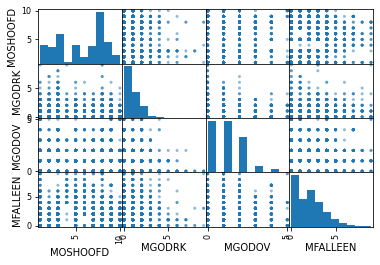

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(insurance_train[['MOSHOOFD', 'MGODRK', 'MGODOV', 'MFALLEEN']])

In [ ]:
insurance_train.MFALLEEN.unique()

array([1, 0, 4, 2, 3, 5, 6, 7, 8, 9])

In [ ]:
# Find NA values
print("NA Values:", insurance_train.isna().sum().sum())
print("NA Values:", insurance_test.isna().sum().sum())

NA Values: 0
NA Values: 0


In [ ]:
insurance_train_cat.nunique().sort_values()

insurance_train_cat['AWAOREG']

0      0
1      0
2      0
3      0
4      0
      ..
130    0
131    0
132    0
133    0
134    0
Name: AWAOREG, Length: 135, dtype: int64

### Data Preparation

In [ ]:
# One-Hot Encode

In [ ]:
# Normalize

### Methods (& Experiments)

In [ ]:
# Classification Methods

### Conclusion